# Load Dependencies

In [1]:
import pandas as pd
import numpy as np
from drfp import DrfpEncoder
from scipy.stats import pearsonr
import xgboost as xgb
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load Data

In [2]:
data_file = '../Data/data2/data2.csv'
tmp_df = pd.read_csv(data_file)
cat_smiles = np.array(tmp_df['Catalyst'].to_list())
imine_smiles =  np.array(tmp_df['Imine'].to_list())
thiol_smiles =  np.array(tmp_df['Thiol'].to_list())
labels = np.array(tmp_df['Output'].to_list())
labels_std = (labels - labels.min())/(labels.max()-labels.min())
cat_smi_set = list(set(cat_smiles))
imine_smi_set = list(set(imine_smiles))
thiol_smi_set = list(set(thiol_smiles))
cat_smi_set.sort()
imine_smi_set.sort()
thiol_smi_set.sort()

In [9]:
tem_react=[]
for i in imine_smi_set:
    for j in thiol_smi_set:
        tem_react.append(i+'.'+j+'>>')

In [3]:
tem_react=['O=C(C1=CC=CC=C1)/N=C/C2=CC=C(C(F)(F)F)C=C2.CCS>>O=C(NC(SCC)C1=CC=C(C=C1)C(F)(F)F)C2=CC=CC=C2',
 'O=C(C1=CC=CC=C1)/N=C/C2=CC=C(C(F)(F)F)C=C2.SC1=CC=C(OC)C=C1>>O=C(NC(SC1=CC=C(OC)C=C1)C2=CC=C(C=C2)C(F)(F)F)C3=CC=CC=C3',
 'O=C(C1=CC=CC=C1)/N=C/C2=CC=C(C(F)(F)F)C=C2.SC1=CC=CC=C1>>O=C(NC(SC1=CC=CC=C1)C2=CC=C(C=C2)C(F)(F)F)C3=CC=CC=C3',
 'O=C(C1=CC=CC=C1)/N=C/C2=CC=C(C(F)(F)F)C=C2.SC1=CC=CC=C1C>>O=C(NC(SC1=CC=CC=C1C)C2=CC=C(C=C2)C(F)(F)F)C3=CC=CC=C3',
 'O=C(C1=CC=CC=C1)/N=C/C2=CC=C(C(F)(F)F)C=C2.SC1CCCCC1>>O=C(NC(SC1CCCCC1)C2=CC=C(C=C2)C(F)(F)F)C3=CC=CC=C3',
 'O=C(C1=CC=CC=C1)/N=C/C2=CC=C(Cl)C=C2Cl.CCS>>O=C(NC(SCC)C1=CC=C(C=C1Cl)Cl)C2=CC=CC=C2',
 'O=C(C1=CC=CC=C1)/N=C/C2=CC=C(Cl)C=C2Cl.SC1=CC=C(OC)C=C1>>O=C(NC(SC1=CC=C(OC)C=C1)C2=CC=C(C=C2Cl)Cl)C3=CC=CC=C3',
 'O=C(C1=CC=CC=C1)/N=C/C2=CC=C(Cl)C=C2Cl.SC1=CC=CC=C1>>O=C(NC(SC1=CC=CC=C1)C2=CC=C(C=C2Cl)Cl)C3=CC=CC=C3',
 'O=C(C1=CC=CC=C1)/N=C/C2=CC=C(Cl)C=C2Cl.SC1=CC=CC=C1C>>O=C(NC(SC1=CC=CC=C1C)C2=CC=C(C=C2Cl)Cl)C3=CC=CC=C3',
 'O=C(C1=CC=CC=C1)/N=C/C2=CC=C(Cl)C=C2Cl.SC1CCCCC1>>O=C(NC(SC1CCCCC1)C2=CC=C(C=C2Cl)Cl)C3=CC=CC=C3',
 'O=C(C1=CC=CC=C1)/N=C/C2=CC=C(OC)C=C2.CCS>>O=C(NC(SCC)C1=CC=C(C=C1)OC)C2=CC=CC=C2',
 'O=C(C1=CC=CC=C1)/N=C/C2=CC=C(OC)C=C2.SC1=CC=C(OC)C=C1>>O=C(NC(SC1=CC=C(OC)C=C1)C2=CC=C(C=C2)OC)C3=CC=CC=C3',
 'O=C(C1=CC=CC=C1)/N=C/C2=CC=C(OC)C=C2.SC1=CC=CC=C1>>O=C(NC(SC1=CC=CC=C1)C2=CC=C(C=C2)OC)C3=CC=CC=C3',
 'O=C(C1=CC=CC=C1)/N=C/C2=CC=C(OC)C=C2.SC1=CC=CC=C1C>>O=C(NC(SC1=CC=CC=C1C)C2=CC=C(C=C2)OC)C3=CC=CC=C3',
 'O=C(C1=CC=CC=C1)/N=C/C2=CC=C(OC)C=C2.SC1CCCCC1>>O=C(NC(SC1CCCCC1)C2=CC=C(C=C2)OC)C3=CC=CC=C3',
 'O=C(C1=CC=CC=C1)/N=C/C2=CC=CC3=C2C=CC=C3.CCS>>O=C(NC(SCC)C1=C2C(C=CC=C2)=CC=C1)C3=CC=CC=C3',
 'O=C(C1=CC=CC=C1)/N=C/C2=CC=CC3=C2C=CC=C3.SC1=CC=C(OC)C=C1>>O=C(NC(SC1=CC=C(OC)C=C1)C2=CC=CC3=C2C=CC=C3)C4=CC=CC=C4',
 'O=C(C1=CC=CC=C1)/N=C/C2=CC=CC3=C2C=CC=C3.SC1=CC=CC=C1>>O=C(NC(SC1=CC=CC=C1)C2=CC=CC3=C2C=CC=C3)C4=CC=CC=C4',
 'O=C(C1=CC=CC=C1)/N=C/C2=CC=CC3=C2C=CC=C3.SC1=CC=CC=C1C>>O=C(NC(SC1=CC=CC=C1C)C2=CC=CC3=C2C=CC=C3)C4=CC=CC=C4',
 'O=C(C1=CC=CC=C1)/N=C/C2=CC=CC3=C2C=CC=C3.SC1CCCCC1>>O=C(NC(SC1CCCCC1)C2=CC=CC3=C2C=CC=C3)C4=CC=CC=C4',
 'O=C(C1=CC=CC=C1)/N=C/C2=CC=CC=C2.CCS>>O=C(NC(SCC)C1=CC=CC=C1)C2=CC=CC=C2',
 'O=C(C1=CC=CC=C1)/N=C/C2=CC=CC=C2.SC1=CC=C(OC)C=C1>>O=C(NC(SC1=CC=C(OC)C=C1)C2=CC=CC=C2)C3=CC=CC=C3',
 'O=C(C1=CC=CC=C1)/N=C/C2=CC=CC=C2.SC1=CC=CC=C1>>O=C(NC(SC1=CC=CC=C1)C2=CC=CC=C2)C3=CC=CC=C3',
 'O=C(C1=CC=CC=C1)/N=C/C2=CC=CC=C2.SC1=CC=CC=C1C>>O=C(NC(SC1=CC=CC=C1C)C2=CC=CC=C2)C3=CC=CC=C3',
 'O=C(C1=CC=CC=C1)/N=C/C2=CC=CC=C2.SC1CCCCC1>>O=C(NC(SC1CCCCC1)C2=CC=CC=C2)C3=CC=CC=C3']

# Generate Descriptor

In [4]:
from drfp import DrfpEncoder
final_react=[]
for i in range(1075):
    for j in tem_react:
        if j.split('>>')[0]==imine_smiles[i]+'.'+thiol_smiles[i]:   
            final_react.append(j.split('>>')[0]+'.'+cat_smiles[i]+'>>'+j.split('>>')[1])
drfp = np.array(DrfpEncoder.encode(final_react))
len(final_react)

1075

# Training Models

## Thiol Splitting

In [17]:
XGB_opt = xgb.XGBRegressor(max_depth=None)     

In [18]:
train_thiol = [ 'SC1=CC=CC=C1C', 'SC1=CC=C(OC)C=C1','SC1=CC=CC=C1']
test_thiol = ['SC1CCCCC1','CCS']

train_index = []
val_index = []
for tmp_idx,tmp_smi in enumerate(thiol_smiles):
    if tmp_smi in train_thiol:
        train_index.append(tmp_idx)
    elif tmp_smi in test_thiol:
        val_index.append(tmp_idx)
model= XGB_opt
all_r2 = []
all_pearsr = []
all_mae = []
all_rmse= []
repeat_pred = []
repeat_test = []
for i in range(10):           
    train_x,test_x = drfp[train_index],drfp[val_index]
    train_y,test_y = labels_std[train_index],labels_std[val_index]
    model.fit(train_x,train_y)
    test_pred = model.predict(test_x)*(labels.max()-labels.min())+labels.min()
    test_y=test_y*(labels.max()-labels.min())+labels.min()
    repeat_pred.append(test_pred)
    repeat_test.append(test_y)
    r2 = r2_score(test_y,test_pred)
    pearsr = pearsonr(test_y,test_pred)
    mae = mean_absolute_error(test_y,test_pred)
    rmse=(mean_squared_error(test_y,test_pred))**(0.5)
    all_r2.append(r2)
    all_pearsr.append(pearsr[0])
    all_mae.append(mae)
    all_rmse.append(rmse)

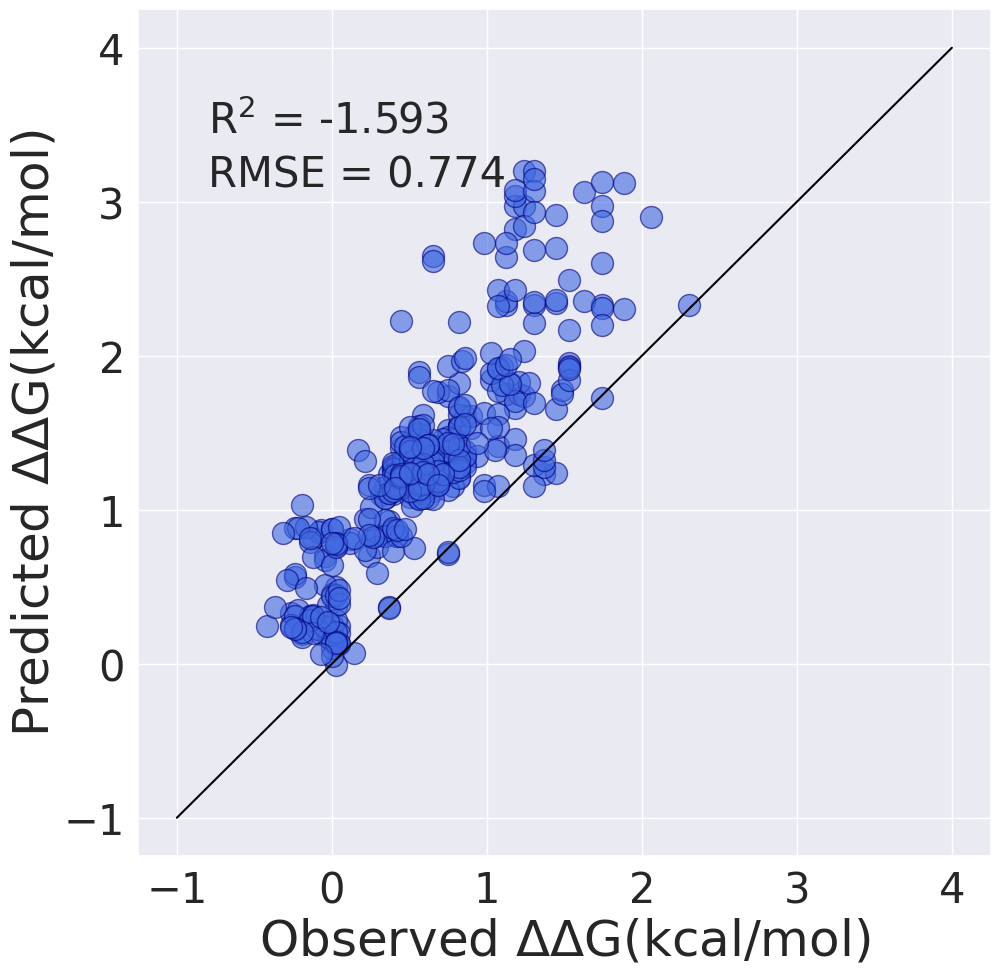

In [19]:
y_val = np.mean(repeat_test,axis=0)
y_pred=np.mean(repeat_pred,axis=0)
np.save('./result/data2_drfp_y_val_thiol.npy',y_val)
np.save('./result/data2_drfp_y_pred_thiol.npy',y_pred)
sns.set(style='darkgrid')
fig = plt.figure(figsize=(11,11),facecolor='white',   
           edgecolor='black')
plt.scatter(y_val,y_pred,s=250, c='royalblue', label="samples",alpha=0.6,edgecolors='navy')
plt.plot([-1,4],[-1,4],c='black')
ax=plt.gca()
#ax.set_facecolor('mistyrose')
plt.xlabel("Observed $\Delta$$\Delta$G(kcal/mol)",fontsize=36)
plt.ylabel("Predicted $\Delta$$\Delta$G(kcal/mol)",fontsize=36)
plt.tick_params(labelsize=30)
plt.text(-0.8,3.1,'RMSE = %.3f'%(mean_squared_error(y_val,y_pred))**(0.5),fontsize=30)
plt.text(-0.8,3.45,'R$^2$ = %.3f'%r2_score(y_val,y_pred),fontsize=30)
plt.show()

## Imine Splitting

In [21]:
train_imine = [ 'O=C(C1=CC=CC=C1)/N=C/C2=CC=CC=C2', 'O=C(C1=CC=CC=C1)/N=C/C2=CC=C(Cl)C=C2Cl',
               'O=C(C1=CC=CC=C1)/N=C/C2=CC=C(OC)C=C2', 'O=C(C1=CC=CC=C1)/N=C/C2=CC=C(C(F)(F)F)C=C2']
test_imine = [ 'O=C(C1=CC=CC=C1)/N=C/C2=CC=CC3=C2C=CC=C3']

train_index = []
val_index = []
for tmp_idx,tmp_smi in enumerate(imine_smiles):
    if tmp_smi in train_imine:
        train_index.append(tmp_idx)
    elif tmp_smi in test_imine:
        val_index.append(tmp_idx)
        
model= XGB_opt
all_r2 = []
all_pearsr = []
all_mae = []
all_rmse= []
repeat_pred = []
repeat_test = []
for i in range(10):           
    train_x,test_x = drfp[train_index],drfp[val_index]
    train_y,test_y = labels_std[train_index],labels_std[val_index]
    model.fit(train_x,train_y)
    test_pred = model.predict(test_x)*(labels.max()-labels.min())+labels.min()
    test_y=test_y*(labels.max()-labels.min())+labels.min()
    repeat_pred.append(test_pred)
    repeat_test.append(test_y)
    r2 = r2_score(test_y,test_pred)
    pearsr = pearsonr(test_y,test_pred)
    mae = mean_absolute_error(test_y,test_pred)
    rmse=(mean_squared_error(test_y,test_pred))**(0.5)
    all_r2.append(r2)
    all_pearsr.append(pearsr[0])
    all_mae.append(mae)
    all_rmse.append(rmse)

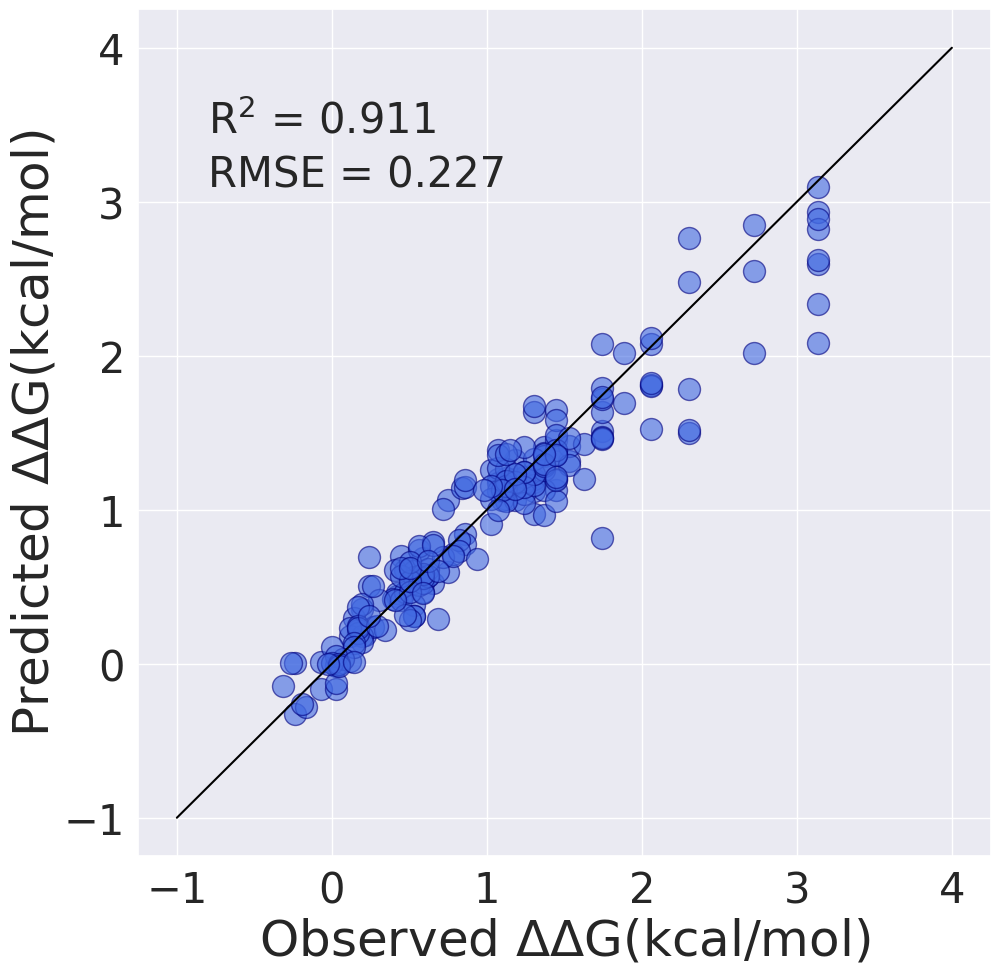

In [22]:
y_val = np.mean(repeat_test,axis=0)
y_pred=np.mean(repeat_pred,axis=0)
np.save('./result/data2_drfp_y_val_imine.npy',y_val)
np.save('./result/data2_drfp_y_pred_imine.npy',y_pred)
sns.set(style='darkgrid')
fig = plt.figure(figsize=(11,11),facecolor='white',   
           edgecolor='black')
plt.scatter(y_val,y_pred,s=250, c='royalblue', label="samples",alpha=0.6,edgecolors='navy')
plt.plot([-1,4],[-1,4],c='black')
ax=plt.gca()
#ax.set_facecolor('mistyrose')
plt.xlabel("Observed $\Delta$$\Delta$G(kcal/mol)",fontsize=36)
plt.ylabel("Predicted $\Delta$$\Delta$G(kcal/mol)",fontsize=36)
plt.tick_params(labelsize=30)
plt.text(-0.8,3.1,'RMSE = %.3f'%(mean_squared_error(y_val,y_pred))**(0.5),fontsize=30)
plt.text(-0.8,3.45,'R$^2$ = %.3f'%r2_score(y_val,y_pred),fontsize=30)
plt.show()

## Catalyst Splitting

In [24]:
cat_id_map_dict={1:'O=P1(O)OC2=C(C3=CC(C(F)(F)F)=CC(C(F)(F)F)=C3)C=C4C(CCCC4)=C2C5=C(O1)C(C6=CC(C(F)(F)F)=CC(C(F)(F)F)=C6)=CC7=C5CCCC7',
                 2:'O=P1(O)OC2=C(C3=CC(C4=CC=C(OC)C=C4)=CC(C5=CC=C(OC)C=C5)=C3)C=C6C(C=CC=C6)=C2C7=C(O1)C(C8=CC(C9=CC=C(OC)C=C9)=CC(C%10=CC=C(OC)C=C%10)=C8)=CC%11=C7C=CC=C%11',
                 3:'O=P1(O)OC2=C(C3=CC(COC)=CC=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=CC(COC)=C6)=CC7=C5C=CC=C7', 
                 4:'O=P1(O)OC2=C(C3=CC(C(F)(F)F)=CC(C(F)(F)F)=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC(C(F)(F)F)=CC(C(F)(F)F)=C6)=CC7=C5C=CC=C7', 
                 5:'O=P1(O)OC2=C(Br)C=C3C(CCCC3)=C2C4=C(O1)C(Br)=CC5=C4CCCC5', 
                 6:'O=P1(O)OC2=C(C3=CC=C(C4CCCCC4)C=C3)C=C5C(CCCC5)=C2C6=C(O1)C(C7=CC=C(C8CCCCC8)C=C7)=CC9=C6CCCC9', 
                 7:'O=P1(O)OC2=C(CC3=C(C=CC=C4)C4=CC5=C3C=CC=C5)C=C6C(C=CC=C6)=C2C7=C(O1)C(CC8=C(C=CC=C9)C9=CC%10=C8C=CC=C%10)=CC%11=C7C=CC=C%11',
                 8:'O=P1(O)OC2=C(C3=CC(C)=C(OC(C)C)C(C)=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC(C)=C(OC(C)C)C(C)=C6)=CC7=C5C=CC=C7',
                 9:'O=P1(O)OC2=C([Si](C3=CC=CC=C3)(C)C4=CC=CC=C4)C=C5C(C=CC=C5)=C2C6=C(O1)C([Si](C7=CC=CC=C7)(C8=CC=CC=C8)C)=CC9=C6C=CC=C9', 
                 10:'O=P1(O)OC2=C(CC3=CC=C(OC)C=C3)C=C4C(CCCC4)=C2C5=C(O1)C(CC6=CC=C(OC)C=C6)=CC7=C5CCCC7',
                 11:'O=P1(O)OC2=[C@]([C@]3=C(Cl)C=C(Cl)C=C3Cl)C=C4C(CCCC4)=[C@]2[C@]5=C(O1)C(C6=C(Cl)C=C(Cl)C=C6Cl)=CC7=C5CCCC7',
                 12:'O=P1(O)OC2=C(C3=CC(C4=CC(C(F)(F)F)=CC(C(F)(F)F)=C4)=CC(C5=CC(C(F)(F)F)=CC(C(F)(F)F)=C5)=C3)C=C6C(C=CC=C6)=C2C7=C(O1)C(C8=CC(C9=CC(C(F)(F)F)=CC(C(F)(F)F)=C9)=CC(C%10=CC(C(F)(F)F)=CC(C(F)(F)F)=C%10)=C8)=CC%11=C7C=CC=C%11',
                 13:'O=P1(O)OC2=C([Si](C3=CC=CC=C3)(C4=CC=CC=C4)C5=CC=CC=C5)C=C6C(C=CC=C6)=C2C7=C(O1)C([Si](C8=CC=CC=C8)(C9=CC=CC=C9)C%10=CC=CC=C%10)=CC%11=C7C=CC=C%11', 
                 14:'O=P1(O)OC2=C([Si](C3=CC=CC=C3)(C4=CC=CC=C4)C5=CC=CC=C5)C=C6C(CCCC6)=C2C7=C(O1)C([Si](C8=CC=CC=C8)(C9=CC=CC=C9)C%10=CC=CC=C%10)=CC%11=C7CCCC%11', 
                 15:'O=P1(O)OC2=C(C3=C(F)C=C(OC)C=C3F)C=C4C(C=CC=C4)=[C@]2[C@]5=C(O1)C(C6=C(F)C=C(OC)C=C6F)=CC7=C5C=CC=C7', 
                 16:'O=P1(O)OC2=C(C3=CC(C4=CC(C=CC=C5)=C5C=C4)=CC=C3)C=C6C(C=CC=C6)=C2C7=C(O1)C(C8=CC=CC(C9=CC=C(C=CC=C%10)C%10=C9)=C8)=CC%11=C7C=CC=C%11', 
                 17:'O=P1(O)OC2=C(C3=CC(C(C)(C)C)=CC(C(C)(C)C)=C3)C=C4C(CCCC4)=C2C5=C(O1)C(C6=CC(C(C)(C)C)=CC(C(C)(C)C)=C6)=CC7=C5CCCC7',
                 18:'O=P1(O)OC2=C(C3=C(C4=CC(C=CC=C5)=C5C=C4)C=CC=C3)C=C6C(CCCC6)=C2C7=C(O1)C(C8=CC=CC=C8C9=CC=C(C=CC=C%10)C%10=C9)=CC%11=C7CCCC%11', 
                 19:'O=P1(O)OC2=C(C3=C(C(C)C)C=C(C(C)C)C=C3C(C)C)C=C4C(C=CC=C4)=C2C5=C(O1)[C@@]([C@@]6=C(C(C)C)C=C(C(C)C)C=C6C(C)C)=CC7=C5C=CC=C7', 
                 20:'O=P1(O)OC2=C(C3=C(C(C)C)C=C(C4=CC=C(C(C)(C)C)C=C4)C=C3C(C)C)C=C5C(C=CC=C5)=[C@]2[C@]6=C(O1)C(C7=C(C(C)C)C=C(C8=CC=C(C(C)(C)C)C=C8)C=C7C(C)C)=CC9=C6C=CC=C9', 
                 21:'O=P1(O)OC2=C(C3=CC=C(C4=CC=C(C=CC=C5)C5=C4)C=C3)C=C6C(C=CC=C6)=C2C7=C(O1)C(C8=CC=C(C9=CC(C=CC=C%10)=C%10C=C9)C=C8)=CC%11=C7C=CC=C%11',
                 22:'O=P1(O)OC2=C(C3=CC=C(C(C)(C)C)C=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=C(C(C)(C)C)C=C6)=CC7=C5C=CC=C7', 
                 23:'O=P1(O)OC2=C(C3=C(C=CC4=CC=CC(C=C5)=C46)C6=C5C=C3)C=C7C(C=CC=C7)=C2C8=C(O1)C(C9=CC=C(C=C%10)C%11=C9C=CC%12=CC=CC%10=C%11%12)=CC%13=C8C=CC=C%13',
                 24:'O=P1(O)OC2=C(CC3=CC(C(F)(F)F)=CC(C(F)(F)F)=C3)C=C4C(CCCC4)=C2C5=C(O1)C(CC6=CC(C(F)(F)F)=CC(C(F)(F)F)=C6)=CC7=C5CCCC7',
                 25:'O=P1(O)OC2=C(Br)C=C3C(C=CC=C3)=C2C4=C(O1)C(Br)=CC5=CC=CC=C54', 
                 26:'O=P1(O)OC2=C(CC3=CC=C(C(F)(F)F)C=C3C(F)(F)F)C=C4C(C=CC=C4)=C2C5=C(O1)C(CC6=C(C(F)(F)F)C=C(C(F)(F)F)C=C6)=CC7=C5C=CC=C7',
                 27:'O=P1(O)OC2=C([Si](C3=CC=C(C(C)(C)C)C=C3)(C4=CC=C(C(C)(C)C)C=C4)C5=CC=C(C(C)(C)C)C=C5)C=C6C(CCCC6)=C2C7=C(O1)C([Si](C8=CC=C(C(C)(C)C)C=C8)(C9=CC=C(C(C)(C)C)C=C9)C%10=CC=C(C(C)(C)C)C=C%10)=CC%11=C7CCCC%11', 
                 28:'O=P1(O)OC2=C(C3=C(C=CC=C4)C4=CC5=C3C=CC=C5)C=C6C(C=CC=C6)=C2C7=C(O1)[C@@]([C@@]8=C(C=CC=C9)C9=CC%10=C8C=CC=C%10)=CC%11=C7C=CC=C%11', 
                 29:'O=P1(O)OC2=C(C3=CC(C4=C(C)C=C(C)C=C4C)=CC(C5=C(C)C=C(C)C=C5C)=C3)C=C6C(CCCC6)=C2C7=C(O1)C(C8=CC(C9=C(C)C=C(C)C=C9C)=CC(C%10=C(C)C=C(C)C=C%10C)=C8)=CC%11=C7CCCC%11',
                 30:'O=P1(O)OC2=C(C3=CC=C(S(F)(F)(F)(F)F)C=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=C(S(F)(F)(F)(F)F)C=C6)=CC7=C5C=CC=C7',
                 31:'O=P1(O)OC2=C(C3=CC(COC)=CC=C3)C=C4C(CCCC4)=C2C5=C(O1)C(C6=CC=CC(COC)=C6)=CC7=C5CCCC7',
                 32:'O=P1(O)OC2=C(C3=CC=C(C)C=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=C(C)C=C6)=CC7=C5C=CC=C7',
                 33:'O=P1(O)OC2=C(C3=C(OC(F)(F)F)C=CC=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=CC=C6OC(F)(F)F)=CC7=C5C=CC=C7',
                 34:'O=P1(O)OC2=C(CC)C=C3C(CCCC3)=C2C4=C(O1)C(CC)=CC5=C4CCCC5', 
                 35:'O=P1(O)OC2=C(C3=CC=CC=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=CC=C6)=CC7=C5C=CC=C7', 
                 36:'O=P1(O)OC2=C(C3=C(OC)C=CC=C3OC)C=C4C(C=CC=C4)=C2C5=C(O1)[C@@]([C@@]6=C(OC)C=CC=C6OC)=CC7=C5C=CC=C7',
                 37:'O=P1(O)OC2=C(C3=CC(C(C)(C)C)=CC(C(C)(C)C)=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC(C(C)(C)C)=CC(C(C)(C)C)=C6)=CC7=C5C=CC=C7', 
                 38:'O=P1(O)OC2=C(C3=C(C)C=C(C)C=C3C)C=C4C(C=CC=C4)=C2C5=C(O1)[C@@]([C@@]6=C(C)C=C(C)C=C6C)=CC7=C5C=CC=C7', 
                 39:'O=P1(O)OC2=C(C3=C(C4CCCCC4)C=C(C5CCCCC5)C=C3C6CCCCC6)C=C7C(C=CC=C7)=C2C8=C(O1)[C@@]([C@@]9=C(C%10CCCCC%10)C=C(C%11CCCCC%11)C=C9C%12CCCCC%12)=CC%13=C8C=CC=C%13',
                 40:'O=P1(O)OC2=C(C3=CC=C(C4=CC(C(F)(F)F)=CC(C(F)(F)F)=C4)C=C3)C=C5C(C=CC=C5)=C2C6=C(O1)C(C7=CC=C(C8=CC(C(F)(F)F)=CC(C(F)(F)F)=C8)C=C7)=CC9=C6C=CC=C9',
                 41:'O=P1(O)OC2=C(C3=C(OCC)C=CC(C)=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC(C)=CC=C6OCC)=CC7=C5C=CC=C7', 
                 42:'O=P1(O)OC2=C(C3=C(C=CC=C4)C4=C(C5=CC(C=CC=C6)=C6C=C5)C7=C3C=CC=C7)C=C8C(C=CC=C8)=[C@]2[C@]9=C(O1)C(C%10=C(C=CC=C%11)C%11=C(C%12=CC=C(C=CC=C%13)C%13=C%12)C%14=C%10C=CC=C%14)=CC%15=C9C=CC=C%15', 
                 43:'O=P1(O)OC2=C(C3=CC=C(OC)C=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=C(OC)C=C6)=CC7=C5C=CC=C7'}
withh_index=[0,4,5,9,10,13,16,17,23,26,28,30,33]
withouth_index=[1,2,3,6,7,8,11,12,14,15,18,19,20,21,22,24,25,27,29,31,32,34,35,36,37,38,39,40,41,42]
train_cat=[cat_id_map_dict[tmp_idx+1] for tmp_idx in withouth_index]
test_cat=[cat_id_map_dict[tmp_idx+1] for tmp_idx in withh_index]

train_index = []
val_index = []
for tmp_idx,tmp_smi in enumerate(cat_smiles):
    if tmp_smi in train_cat:
        train_index.append(tmp_idx)
    elif tmp_smi in test_cat:
        val_index.append(tmp_idx)

In [25]:
model= XGB_opt
all_r2 = []
all_pearsr = []
all_mae = []
all_rmse= []
repeat_pred = []
repeat_test = []
for i in range(10):           
    train_x,test_x = drfp[train_index],drfp[val_index]
    train_y,test_y = labels_std[train_index],labels_std[val_index]
    model.fit(train_x,train_y)
    test_pred = model.predict(test_x)*(labels.max()-labels.min())+labels.min()
    test_y=test_y*(labels.max()-labels.min())+labels.min()
    repeat_pred.append(test_pred)
    repeat_test.append(test_y)
    r2 = r2_score(test_y,test_pred)
    pearsr = pearsonr(test_y,test_pred)
    mae = mean_absolute_error(test_y,test_pred)
    rmse=(mean_squared_error(test_y,test_pred))**(0.5)
    all_r2.append(r2)
    all_pearsr.append(pearsr[0])
    all_mae.append(mae)
    all_rmse.append(rmse)

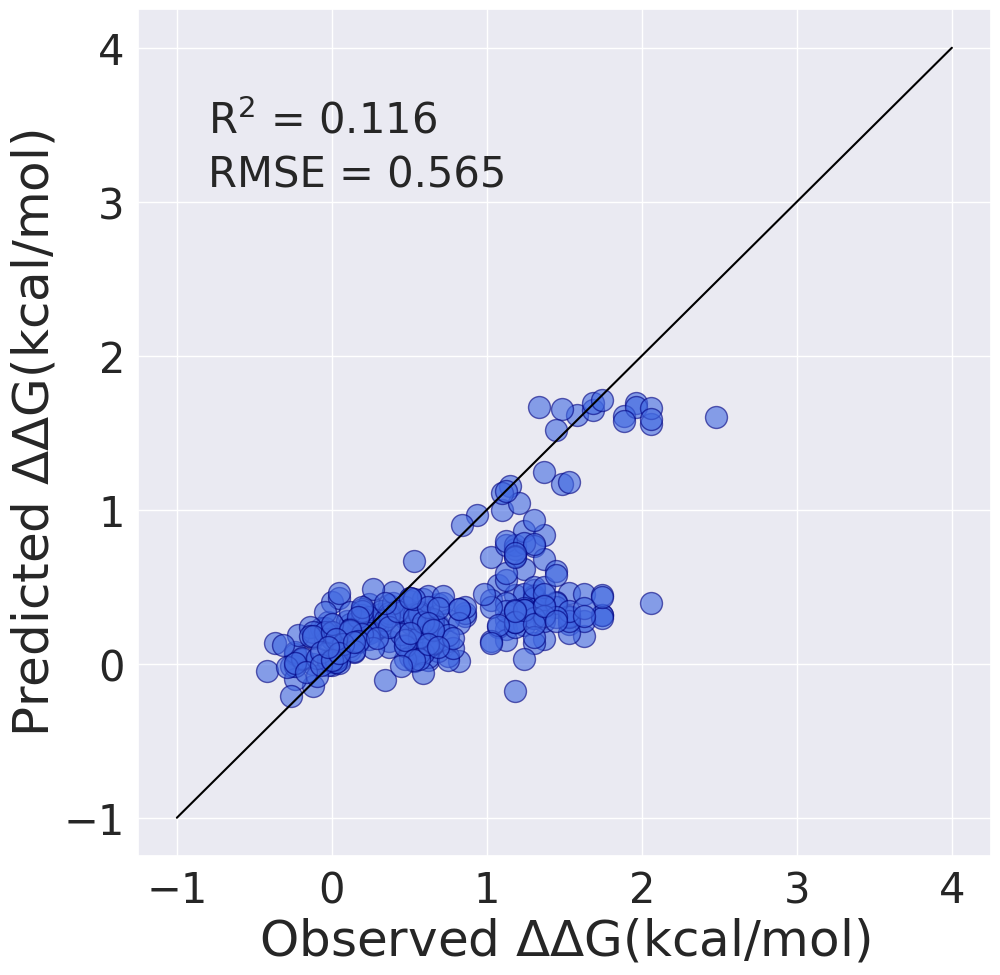

In [26]:
y_val = np.mean(repeat_test,axis=0)
y_pred=np.mean(repeat_pred,axis=0)
np.save('./result/data2_drfp_y_val_cat.npy',y_val)
np.save('./result/data2_drfp_y_pred_cat.npy',y_pred)
sns.set(style='darkgrid')
fig = plt.figure(figsize=(11,11),facecolor='white',   
           edgecolor='black')
plt.scatter(y_val,y_pred,s=250, c='royalblue', label="samples",alpha=0.6,edgecolors='navy')
plt.plot([-1,4],[-1,4],c='black')
ax=plt.gca()
#ax.set_facecolor('mistyrose')
plt.xlabel("Observed $\Delta$$\Delta$G(kcal/mol)",fontsize=36)
plt.ylabel("Predicted $\Delta$$\Delta$G(kcal/mol)",fontsize=36)
plt.tick_params(labelsize=30)
plt.text(-0.8,3.1,'RMSE = %.3f'%(mean_squared_error(y_val,y_pred))**(0.5),fontsize=30)
plt.text(-0.8,3.45,'R$^2$ = %.3f'%r2_score(y_val,y_pred),fontsize=30)
plt.show()

## Transformation

In [28]:
cat_uts_train_smi = ['O=P1(O)OC2=C(Br)C=C3C(C=CC=C3)=C2C4=C(O1)C(Br)=CC5=CC=CC=C54',
                     'O=P1(O)OC2=C(C3=C(C(C)C)C=C(C4=CC=C(C(C)(C)C)C=C4)C=C3C(C)C)C=C5C(C=CC=C5)=[C@]2[C@]6=C(O1)C(C7=C(C(C)C)C=C(C8=CC=C(C(C)(C)C)C=C8)C=C7C(C)C)=CC9=C6C=CC=C9',
                     'O=P1(O)OC2=C(C3=C(C4=CC(C=CC=C5)=C5C=C4)C=CC=C3)C=C6C(CCCC6)=C2C7=C(O1)C(C8=CC=CC=C8C9=CC=C(C=CC=C%10)C%10=C9)=CC%11=C7CCCC%11',
                     'O=P1(O)OC2=C(C3=C(C=CC=C4)C4=C(C5=CC(C=CC=C6)=C6C=C5)C7=C3C=CC=C7)C=C8C(C=CC=C8)=[C@]2[C@]9=C(O1)C(C%10=C(C=CC=C%11)C%11=C(C%12=CC=C(C=CC=C%13)C%13=C%12)C%14=C%10C=CC=C%14)=CC%15=C9C=CC=C%15',
                     'O=P1(O)OC2=C(C3=C(F)C=C(OC)C=C3F)C=C4C(C=CC=C4)=[C@]2[C@]5=C(O1)C(C6=C(F)C=C(OC)C=C6F)=CC7=C5C=CC=C7',
                     'O=P1(O)OC2=C(C3=C(OCC)C=CC(C)=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC(C)=CC=C6OCC)=CC7=C5C=CC=C7',
                     'O=P1(O)OC2=C(C3=CC(C(F)(F)F)=CC(C(F)(F)F)=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC(C(F)(F)F)=CC(C(F)(F)F)=C6)=CC7=C5C=CC=C7',
                     'O=P1(O)OC2=C(C3=CC(C(F)(F)F)=CC(C(F)(F)F)=C3)C=C4C(CCCC4)=C2C5=C(O1)C(C6=CC(C(F)(F)F)=CC(C(F)(F)F)=C6)=CC7=C5CCCC7',
                     'O=P1(O)OC2=C(C3=CC(C)=C(OC(C)C)C(C)=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC(C)=C(OC(C)C)C(C)=C6)=CC7=C5C=CC=C7',
                     'O=P1(O)OC2=C(C3=CC(C4=C(C)C=C(C)C=C4C)=CC(C5=C(C)C=C(C)C=C5C)=C3)C=C6C(CCCC6)=C2C7=C(O1)C(C8=CC(C9=C(C)C=C(C)C=C9C)=CC(C%10=C(C)C=C(C)C=C%10C)=C8)=CC%11=C7CCCC%11',
                     'O=P1(O)OC2=C(C3=CC(C4=CC(C(F)(F)F)=CC(C(F)(F)F)=C4)=CC(C5=CC(C(F)(F)F)=CC(C(F)(F)F)=C5)=C3)C=C6C(C=CC=C6)=C2C7=C(O1)C(C8=CC(C9=CC(C(F)(F)F)=CC(C(F)(F)F)=C9)=CC(C%10=CC(C(F)(F)F)=CC(C(F)(F)F)=C%10)=C8)=CC%11=C7C=CC=C%11',
                     'O=P1(O)OC2=C(C3=CC(C4=CC(C=CC=C5)=C5C=C4)=CC=C3)C=C6C(C=CC=C6)=C2C7=C(O1)C(C8=CC=CC(C9=CC=C(C=CC=C%10)C%10=C9)=C8)=CC%11=C7C=CC=C%11',
                     'O=P1(O)OC2=C(C3=CC(COC)=CC=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=CC(COC)=C6)=CC7=C5C=CC=C7',
                     'O=P1(O)OC2=C(C3=CC=C(C4=CC(C(F)(F)F)=CC(C(F)(F)F)=C4)C=C3)C=C5C(C=CC=C5)=C2C6=C(O1)C(C7=CC=C(C8=CC(C(F)(F)F)=CC(C(F)(F)F)=C8)C=C7)=CC9=C6C=CC=C9',
                     'O=P1(O)OC2=C(C3=CC=C(C4=CC=C(C=CC=C5)C5=C4)C=C3)C=C6C(C=CC=C6)=C2C7=C(O1)C(C8=CC=C(C9=CC(C=CC=C%10)=C%10C=C9)C=C8)=CC%11=C7C=CC=C%11',
                     'O=P1(O)OC2=C(C3=CC=C(C4CCCCC4)C=C3)C=C5C(CCCC5)=C2C6=C(O1)C(C7=CC=C(C8CCCCC8)C=C7)=CC9=C6CCCC9',
                     'O=P1(O)OC2=C(C3=CC=C(S(F)(F)(F)(F)F)C=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=C(S(F)(F)(F)(F)F)C=C6)=CC7=C5C=CC=C7',
                     'O=P1(O)OC2=C(CC)C=C3C(CCCC3)=C2C4=C(O1)C(CC)=CC5=C4CCCC5',
                     'O=P1(O)OC2=C(CC3=C(C=CC=C4)C4=CC5=C3C=CC=C5)C=C6C(C=CC=C6)=C2C7=C(O1)C(CC8=C(C=CC=C9)C9=CC%10=C8C=CC=C%10)=CC%11=C7C=CC=C%11',
                     'O=P1(O)OC2=C(CC3=CC(C(F)(F)F)=CC(C(F)(F)F)=C3)C=C4C(CCCC4)=C2C5=C(O1)C(CC6=CC(C(F)(F)F)=CC(C(F)(F)F)=C6)=CC7=C5CCCC7',
                     'O=P1(O)OC2=C(CC3=CC=C(OC)C=C3)C=C4C(CCCC4)=C2C5=C(O1)C(CC6=CC=C(OC)C=C6)=CC7=C5CCCC7',
                     'O=P1(O)OC2=C([Si](C3=CC=C(C(C)(C)C)C=C3)(C4=CC=C(C(C)(C)C)C=C4)C5=CC=C(C(C)(C)C)C=C5)C=C6C(CCCC6)=C2C7=C(O1)C([Si](C8=CC=C(C(C)(C)C)C=C8)(C9=CC=C(C(C)(C)C)C=C9)C%10=CC=C(C(C)(C)C)C=C%10)=CC%11=C7CCCC%11',
                     'O=P1(O)OC2=C([Si](C3=CC=CC=C3)(C4=CC=CC=C4)C5=CC=CC=C5)C=C6C(CCCC6)=C2C7=C(O1)C([Si](C8=CC=CC=C8)(C9=CC=CC=C9)C%10=CC=CC=C%10)=CC%11=C7CCCC%11',
                     'O=P1(O)OC2=[C@]([C@]3=C(Cl)C=C(Cl)C=C3Cl)C=C4C(CCCC4)=[C@]2[C@]5=C(O1)C(C6=C(Cl)C=C(Cl)C=C6Cl)=CC7=C5CCCC7'
                    ]
cat_uts_test_smi = ['O=P1(O)OC2=C(Br)C=C3C(CCCC3)=C2C4=C(O1)C(Br)=CC5=C4CCCC5',
                    'O=P1(O)OC2=C(C3=C(C(C)C)C=C(C(C)C)C=C3C(C)C)C=C4C(C=CC=C4)=C2C5=C(O1)[C@@]([C@@]6=C(C(C)C)C=C(C(C)C)C=C6C(C)C)=CC7=C5C=CC=C7',
                    'O=P1(O)OC2=C(C3=C(C)C=C(C)C=C3C)C=C4C(C=CC=C4)=C2C5=C(O1)[C@@]([C@@]6=C(C)C=C(C)C=C6C)=CC7=C5C=CC=C7',
                    'O=P1(O)OC2=C(C3=C(C4CCCCC4)C=C(C5CCCCC5)C=C3C6CCCCC6)C=C7C(C=CC=C7)=C2C8=C(O1)[C@@]([C@@]9=C(C%10CCCCC%10)C=C(C%11CCCCC%11)C=C9C%12CCCCC%12)=CC%13=C8C=CC=C%13',
                    'O=P1(O)OC2=C(C3=C(C=CC4=CC=CC(C=C5)=C46)C6=C5C=C3)C=C7C(C=CC=C7)=C2C8=C(O1)C(C9=CC=C(C=C%10)C%11=C9C=CC%12=CC=CC%10=C%11%12)=CC%13=C8C=CC=C%13',
                    'O=P1(O)OC2=C(C3=C(C=CC=C4)C4=CC5=C3C=CC=C5)C=C6C(C=CC=C6)=C2C7=C(O1)[C@@]([C@@]8=C(C=CC=C9)C9=CC%10=C8C=CC=C%10)=CC%11=C7C=CC=C%11',
                    'O=P1(O)OC2=C(C3=C(OC)C=CC=C3OC)C=C4C(C=CC=C4)=C2C5=C(O1)[C@@]([C@@]6=C(OC)C=CC=C6OC)=CC7=C5C=CC=C7',
                    'O=P1(O)OC2=C(C3=CC(C(C)(C)C)=CC(C(C)(C)C)=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC(C(C)(C)C)=CC(C(C)(C)C)=C6)=CC7=C5C=CC=C7',
                    'O=P1(O)OC2=C(C3=CC(C(C)(C)C)=CC(C(C)(C)C)=C3)C=C4C(CCCC4)=C2C5=C(O1)C(C6=CC(C(C)(C)C)=CC(C(C)(C)C)=C6)=CC7=C5CCCC7',
                    'O=P1(O)OC2=C(C3=CC(C4=CC=C(OC)C=C4)=CC(C5=CC=C(OC)C=C5)=C3)C=C6C(C=CC=C6)=C2C7=C(O1)C(C8=CC(C9=CC=C(OC)C=C9)=CC(C%10=CC=C(OC)C=C%10)=C8)=CC%11=C7C=CC=C%11',
                    'O=P1(O)OC2=C(C3=CC(COC)=CC=C3)C=C4C(CCCC4)=C2C5=C(O1)C(C6=CC=CC(COC)=C6)=CC7=C5CCCC7',
                    'O=P1(O)OC2=C(C3=CC=C(C(C)(C)C)C=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=C(C(C)(C)C)C=C6)=CC7=C5C=CC=C7',
                    'O=P1(O)OC2=C(C3=CC=C(C)C=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=C(C)C=C6)=CC7=C5C=CC=C7',
                    'O=P1(O)OC2=C(C3=CC=C(OC)C=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=C(OC)C=C6)=CC7=C5C=CC=C7',
                    'O=P1(O)OC2=C(C3=CC=CC=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=CC=C6)=CC7=C5C=CC=C7',
                    'O=P1(O)OC2=C(CC3=CC=C(C(F)(F)F)C=C3C(F)(F)F)C=C4C(C=CC=C4)=C2C5=C(O1)C(CC6=C(C(F)(F)F)C=C(C(F)(F)F)C=C6)=CC7=C5C=CC=C7',
                    'O=P1(O)OC2=C([Si](C3=CC=CC=C3)(C)C4=CC=CC=C4)C=C5C(C=CC=C5)=C2C6=C(O1)C([Si](C7=CC=CC=C7)(C8=CC=CC=C8)C)=CC9=C6C=CC=C9',
                    'O=P1(O)OC2=C([Si](C3=CC=CC=C3)(C4=CC=CC=C4)C5=CC=CC=C5)C=C6C(C=CC=C6)=C2C7=C(O1)C([Si](C8=CC=CC=C8)(C9=CC=CC=C9)C%10=CC=CC=C%10)=CC%11=C7C=CC=C%11',
                    'O=P1(O)OC2=C(C3=C(OC(F)(F)F)C=CC=C3)C=C4C(C=CC=C4)=C2C5=C(O1)C(C6=CC=CC=C6OC(F)(F)F)=CC7=C5C=CC=C7'
                   ]
imine_test_smi = 'O=C(C1=CC=CC=C1)/N=C/C2=CC=C(Cl)C=C2Cl'
thiol_test_smi = 'SC1=CC=CC=C1C'

train_idx = []
trans_test_idx = []
for tmp_idx in range(len(cat_smiles)):
    tmp_cat_smi = cat_smiles[tmp_idx]
    tmp_imine_smi = imine_smiles[tmp_idx]
    tmp_thiol_smi = thiol_smiles[tmp_idx]
    if tmp_cat_smi in cat_uts_train_smi and tmp_imine_smi != imine_test_smi and tmp_thiol_smi != thiol_test_smi:
        train_idx.append(tmp_idx)
    elif (tmp_cat_smi in cat_uts_train_smi and tmp_imine_smi == imine_test_smi) or (tmp_cat_smi in cat_uts_train_smi and tmp_thiol_smi == thiol_test_smi):
        trans_test_idx.append(tmp_idx)

In [29]:
train_index=train_idx
val_index=trans_test_idx
model= XGB_opt    
all_r2 = []
all_pearsr = []
all_mae = []
all_rmse= []
repeat_pred = []
repeat_test = []
for i in range(10):           
    train_x,test_x = drfp[train_index],drfp[val_index]
    train_y,test_y = labels_std[train_index],labels_std[val_index]
    model.fit(train_x,train_y)
    test_pred = model.predict(test_x)*(labels.max()-labels.min())+labels.min()
    test_y=test_y*(labels.max()-labels.min())+labels.min()
    repeat_pred.append(test_pred)
    repeat_test.append(test_y)
    r2 = r2_score(test_y,test_pred)
    pearsr = pearsonr(test_y,test_pred)
    mae = mean_absolute_error(test_y,test_pred)
    rmse=(mean_squared_error(test_y,test_pred))**(0.5)
    all_r2.append(r2)
    all_pearsr.append(pearsr[0])
    all_mae.append(mae)
    all_rmse.append(rmse)

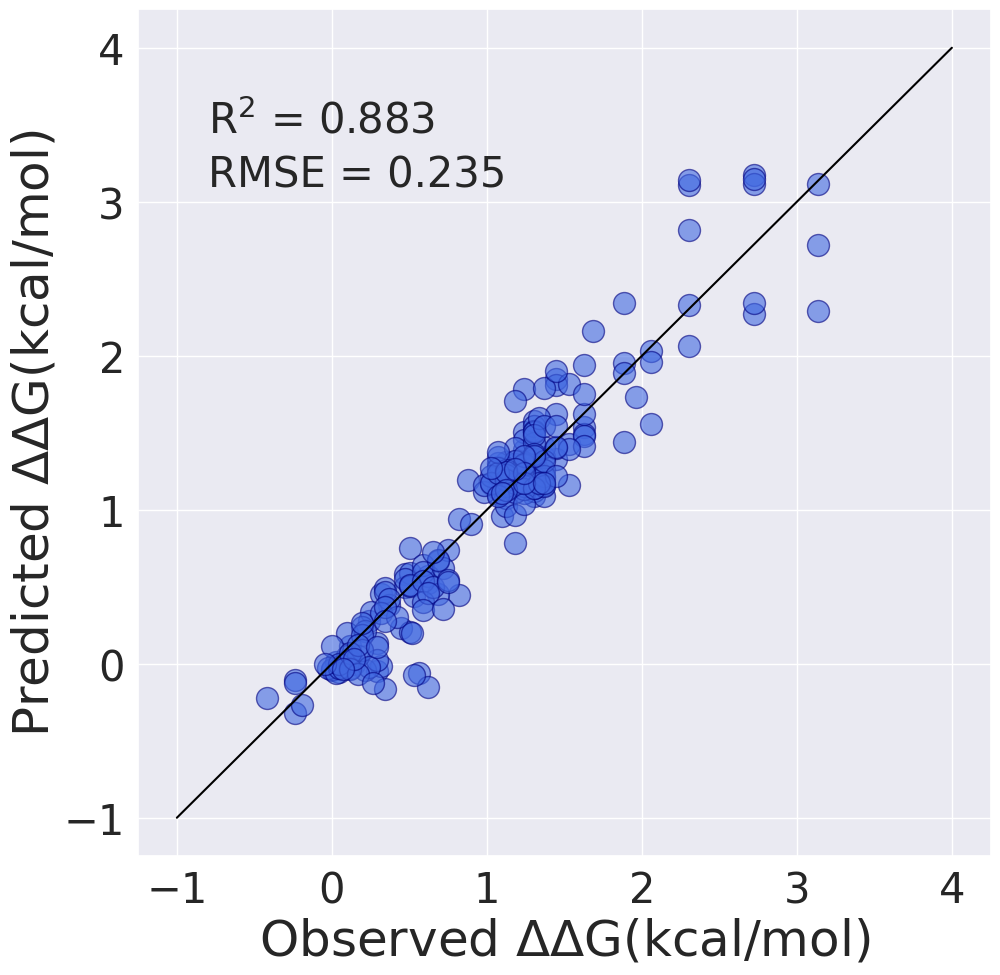

In [31]:
y_val = np.mean(repeat_test,axis=0)
y_pred=np.mean(repeat_pred,axis=0)

sns.set(style='darkgrid')
fig = plt.figure(figsize=(11,11),facecolor='white',   
           edgecolor='black')
plt.scatter(y_val,y_pred,s=250, c='royalblue', label="samples",alpha=0.6,edgecolors='navy')
plt.plot([-1,4],[-1,4],c='black')
ax=plt.gca()
plt.xlabel("Observed $\Delta$$\Delta$G(kcal/mol)",fontsize=36)
plt.ylabel("Predicted $\Delta$$\Delta$G(kcal/mol)",fontsize=36)
plt.tick_params(labelsize=30)
plt.text(-0.8,3.1,'RMSE = %.3f'%(mean_squared_error(y_val,y_pred))**(0.5),fontsize=30)
plt.text(-0.8,3.45,'R$^2$ = %.3f'%r2_score(y_val,y_pred),fontsize=30)
plt.show()

## External test

In [43]:
external_test_react=['O=C(C1=CC=CC=C1)/N=C/C2=CC=CC=C2.SC1=CC=C(OC)C=C1.O=P1(O)OC2=[C@@](C3=CC=CC=C3C=C2C4=C(C(C)C)C=C(C5=C(C=CC=C6)C6=CC7=C5C=CC=C7)C=C4C(C)C)[C@@]8=C9C=CC=CC9=C[C@@]([C@@]%10=C(C(C)C)C=C(C%11=C(C=CC=C%12)C%12=CC%13=C%11C=CC=C%13)C=C%10C(C)C)=C8O1>>O=C(C1=CC=CC=C1)N[C@H](SC2=CC=C(OC)C=C2)C3=CC=CC=C3',
'O=C(C1=CC=CC=C1)/N=C/C2=CC=CC=C2.SC1=CC=C(OC)C=C1.O=P1(O)OC2=[C@@](C3=CC=CC=C3C=C2C4=C(C=CC=C5)C5=C(C=CC=C6)C6=C4)[C@@]7=C8C=CC=CC8=CC(C9=CC(C=CC=C%10)=C%10C%11=C9C=CC=C%11)=C7O1>>O=C(C1=CC=CC=C1)N[C@H](SC2=CC=C(OC)C=C2)C3=CC=CC=C3',
'O=C(C1=CC=CC=C1)/N=C/C2=CC=CC=C2.SC1=CC=C(OC)C=C1.O=P1(O)OC2=[C@@](C3=CC=CC=C3C=C2C4=C(C=CC=C5)C5=CC=C4)[C@@]6=C7C=CC=CC7=CC(C8=CC=CC9=C8C=CC=C9)=C6O1>>O=C(C1=CC=CC=C1)N[C@H](SC2=CC=C(OC)C=C2)C3=CC=CC=C3',
'O=C(C1=CC=CC=C1)/N=C/C2=CC=CC=C2.SC1=CC=C(OC)C=C1.O=P1(O)OC2=C(C3=CC=CC=C3C=[C@]2[C@]4=C(C5=CC=CC=C5)C=C(C6=CC=CC=C6)C=C4C7=CC=CC=C7)C8=C9C=CC=CC9=C[C@@]([C@@]%10=C(C%11=CC=CC=C%11)C=C(C%12=CC=CC=C%12)C=C%10C%13=CC=CC=C%13)=C8O1>>O=C(C1=CC=CC=C1)N[C@H](SC2=CC=C(OC)C=C2)C3=CC=CC=C3',
'O=C(C1=CC=CC=C1)/N=C/C2=CC=CC=C2.SC1=CC=C(OC)C=C1.O=P1(O)OC2=[C@@](C3=CC=CC=C3C=C2C4=CC(C5=CC=CC=C5)=CC(C6=CC=CC=C6)=C4)[C@@]7=C8C=CC=CC8=CC(C9=CC(C%10=CC=CC=C%10)=CC(C%11=CC=CC=C%11)=C9)=C7O1>>O=C(C1=CC=CC=C1)N[C@H](SC2=CC=C(OC)C=C2)C3=CC=CC=C3',
'O=C(C1=CC=CC=C1)/N=C/C2=CC=CC=C2.SC1=CC=C(OC)C=C1.O=P1(O)OC2=[C@@](C3=CC=CC=C3C=C2C4=CC(Cl)=CC(Cl)=C4)[C@@]5=C6C=CC=CC6=CC(C7=CC(Cl)=CC(Cl)=C7)=C5O1>>O=C(C1=CC=CC=C1)N[C@H](SC2=CC=C(OC)C=C2)C3=CC=CC=C3',
'O=C(C1=CC=CC=C1)/N=C/C2=CC=CC=C2.SC1=CC=C(OC)C=C1.O=P1(O)OC2=[C@@](C3=CC=CC=C3C=C2C4=CC(C(C)(C)C)=C(OC)C(C(C)(C)C)=C4)[C@@]5=C6C=CC=CC6=CC(C7=CC(C(C)(C)C)=C(OC)C(C(C)(C)C)=C7)=C5O1>>O=C(C1=CC=CC=C1)N[C@H](SC2=CC=C(OC)C=C2)C3=CC=CC=C3',
'O=C(C1=CC=CC=C1)/N=C/C2=CC=CC=C2.SC1=CC=C(OC)C=C1.O=P1(O)OC2=[C@@](C3=CC=CC=C3C=C2C4=CC=C(C5=CC=CC=C5)C=C4)[C@@]6=C7C=CC=CC7=CC(C8=CC=C(C9=CC=CC=C9)C=C8)=C6O1>>O=C(C1=CC=CC=C1)N[C@H](SC2=CC=C(OC)C=C2)C3=CC=CC=C3',
'O=C(C1=CC=CC=C1)/N=C/C2=CC=CC=C2.SC1=CC=C(OC)C=C1.O=P1(O)OC2=[C@@](C3=CC=CC=C3C=C2C4=CC=C(C(F)(F)F)C=C4)[C@@]5=C6C=CC=CC6=CC(C7=CC=C(C(F)(F)F)C=C7)=C5O1>>O=C(C1=CC=CC=C1)N[C@H](SC2=CC=C(OC)C=C2)C3=CC=CC=C3',
'O=C(C1=CC=CC=C1)/N=C/C2=CC=CC=C2.SC1=CC=C(OC)C=C1.O=P1(O)OC2=[C@@](C3=CC=CC=C3C=C2C4=CC=C(Cl)C=C4)[C@@]5=C6C=CC=CC6=CC(C7=CC=C(Cl)C=C7)=C5O1>>O=C(C1=CC=CC=C1)N[C@H](SC2=CC=C(OC)C=C2)C3=CC=CC=C3',
'O=C(C1=CC=CC=C1)/N=C/C2=CC=CC=C2.SC1=CC=C(OC)C=C1.O=P1(O)OC2=[C@@](C3=CC=CC=C3C=C2)[C@@]4=C5C=CC=CC5=CC=C4O1>>O=C(C1=CC=CC=C1)N[C@H](SC2=CC=C(OC)C=C2)C3=CC=CC=C3']

In [45]:
drfp_test = np.array(DrfpEncoder.encode(external_test_react))
len(drfp_test)

11

In [54]:
y_exp=np.array([1.15, 0.98 , 0.92, 0.84 ,0.77, 0.73, 0.68 ,0.67, 0.65 ,0.52 ,0.08])
model= XGB_opt   
all_r2 = []
all_pearsr = []
all_mae = []
all_rmse= []
repeat_pred = []
repeat_test = []
for i in range(10):           
    train_x,test_x = drfp,drfp_test
    train_y,test_y = labels*0.693,y_exp
    model.fit(train_x,train_y)
    test_pred = model.predict(test_x)
    test_y=test_y
    repeat_pred.append(test_pred)
    repeat_test.append(test_y)
    r2 = r2_score(test_y,test_pred)
    pearsr = pearsonr(test_y,test_pred)
    mae = mean_absolute_error(test_y,test_pred)
    rmse=(mean_squared_error(test_y,test_pred))**(0.5)
    all_r2.append(r2)
    all_pearsr.append(pearsr[0])
    all_mae.append(mae)
    all_rmse.append(rmse)

In [56]:
y_pred

array([1.8258237, 1.1765916, 1.5004433, 1.4384868, 1.3597177, 1.1543034,
       1.1546756, 1.342108 , 1.3583729, 1.3650602, 1.1541837],
      dtype=float32)

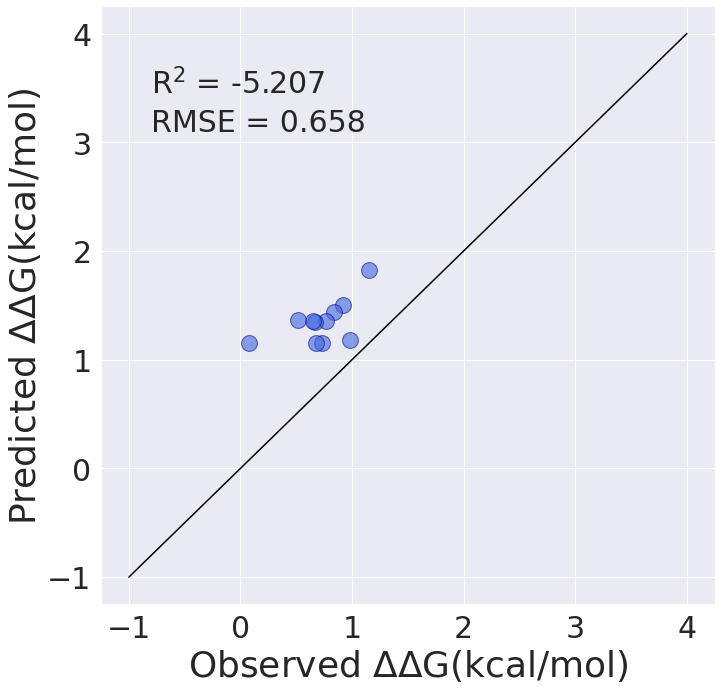

In [55]:
y_val = np.mean(repeat_test,axis=0)
y_pred=np.mean(repeat_pred,axis=0)

sns.set(style='darkgrid')
fig = plt.figure(figsize=(11,11),facecolor='white',   
           edgecolor='black')
plt.scatter(y_val,y_pred,s=250, c='royalblue', label="samples",alpha=0.6,edgecolors='navy')
plt.plot([-1,4],[-1,4],c='black')
ax=plt.gca()
plt.xlabel("Observed $\Delta$$\Delta$G(kcal/mol)",fontsize=36)
plt.ylabel("Predicted $\Delta$$\Delta$G(kcal/mol)",fontsize=36)
plt.tick_params(labelsize=30)
plt.text(-0.8,3.1,'RMSE = %.3f'%(mean_squared_error(y_val,y_pred))**(0.5),fontsize=30)
plt.text(-0.8,3.45,'R$^2$ = %.3f'%r2_score(y_val,y_pred),fontsize=30)
plt.show()

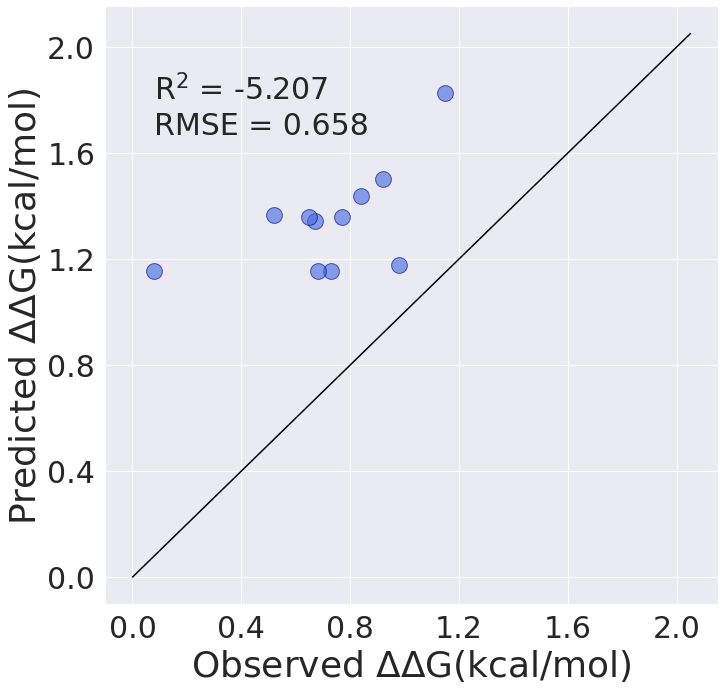

In [67]:
sns.set(style='darkgrid')
fig = plt.figure(figsize=(11,11),facecolor='white',   
           edgecolor='black')
plt.scatter(y_val,y_pred,s=250, c='royalblue', label="samples",alpha=0.6,edgecolors='navy')
plt.plot([0,2.05],[0,2.05],c='black')
ax=plt.gca()
#ax.set_facecolor('mistyrose')
plt.xlabel("Observed $\Delta$$\Delta$G(kcal/mol)",fontsize=36)
plt.ylabel("Predicted $\Delta$$\Delta$G(kcal/mol)",fontsize=36)
plt.tick_params(labelsize=30)
plt.xticks(np.arange(0, 2.05, step=0.4))
plt.yticks(np.arange(0, 2.05, step=0.4))
plt.text(0.08,1.67,'RMSE = %.3f'%(mean_squared_error(y_val,y_pred))**(0.5),fontsize=30)
plt.text(0.08,1.8,'R$^2$ = %.3f'%r2_score(y_val,y_pred),fontsize=30)
plt.show()